# Plot error threshold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial

# Function to calculate logical error rate P_L
def logical_error_rate(d, P_e):
    d_e = (d + 1) // 2
    comb = factorial(d) / (factorial(d_e - 1) * factorial(d_e))
    P_L = d * comb * (P_e ** d_e)
    return P_L

# Code distances to consider
code_distances = [3,  7,  11, 15, 19, 23, 27, 30]

# Physical error rates to consider
P_e_values = np.linspace(0.0001, 0.5, 100)

# Physical error rates to consider
P_e_values = np.logspace(-8, 1, 100)  # Logarithmic scale from 0.001 to 0.1

# Plotting the results
plt.figure(figsize=(10, 6))

for d in code_distances:
    P_L_values = [logical_error_rate(d, P_e) for P_e in P_e_values]
    plt.plot(P_e_values, P_L_values, label=f'd = {d}')

plt.xscale('log')
plt.yscale('log')  # Logical error rate is typically plotted on a logarithmic scale
plt.xlabel(r'Physical Error Rate ($P_e$)')
plt.ylabel(r'Logical Error Rate ($P_L$)')
plt.title('Logical Error Rate vs. Physical Error Rate for Different Code Distances (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.savefig("SurfaceEstimate.png")
plt.show()


# Plot binomial distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 5000
p = 0.01

# Binomial distribution
k = np.arange(0, n+1)
probabilities = binom.pmf(k, n, p)

plt.figure(figsize=(10, 6))
plt.stem(k, probabilities)
plt.xlim(0,2*n*p)
plt.xlabel('Number of Errors')
plt.ylabel('Probability')
plt.title('Binomial Distribution of the number of error (n=50, p=0.01)')
plt.grid(True)
plt.savefig("Binomial")
plt.show()

# Histogram of 2 qubit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed probability value
p = 0.85

# Calculate probabilities for the first set of equations
P1_0 = (1-p)**4 + p**2 * (1-p)**2 + 2 * p**3 * (1-p)
P1_1 = 3*p * (1-p)**3 + 3*p**2 * (1-p)**2 + p**3 * (1-p) + p**4
P1_2 = p * (1-p)**3 + 2 * p**2 * (1-p)**2 + p**3 * (1-p)

# Calculate probabilities for the second set of equations
P2_0 = (2*p**2 - 2*p + 1)**2
P2_1 = 2 * (2*p - 2*p**2) * (2*p**2 - 2*p + 1)
P2_2 = (2*p - 2*p**2)**2

# Data for histograms
values = np.array([0, 1, 2])
P1_values = [P1_0, P1_1, P1_2]
P2_values = [P2_0, P2_1, P2_2]

# Bar width
bar_width = 0.25

# Plot the histograms
plt.figure(figsize=(10, 6))

# Histogram for the first set of probabilities
plt.bar(values - bar_width/2, P1_values, bar_width, label='After CNOT propagation', color='blue', edgecolor='black')

# Histogram for the second set of probabilities
plt.bar(values + bar_width/2, P2_values, bar_width, label='Before CNOT propagation', color='red', edgecolor='black')

plt.xlabel('Number of Bitflip errors at T=2',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.title('Histogram of Two Probability Distributions for p=0.85',fontsize=16)
plt.xticks(values)
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("2QubitDistribution.png")
plt.show()


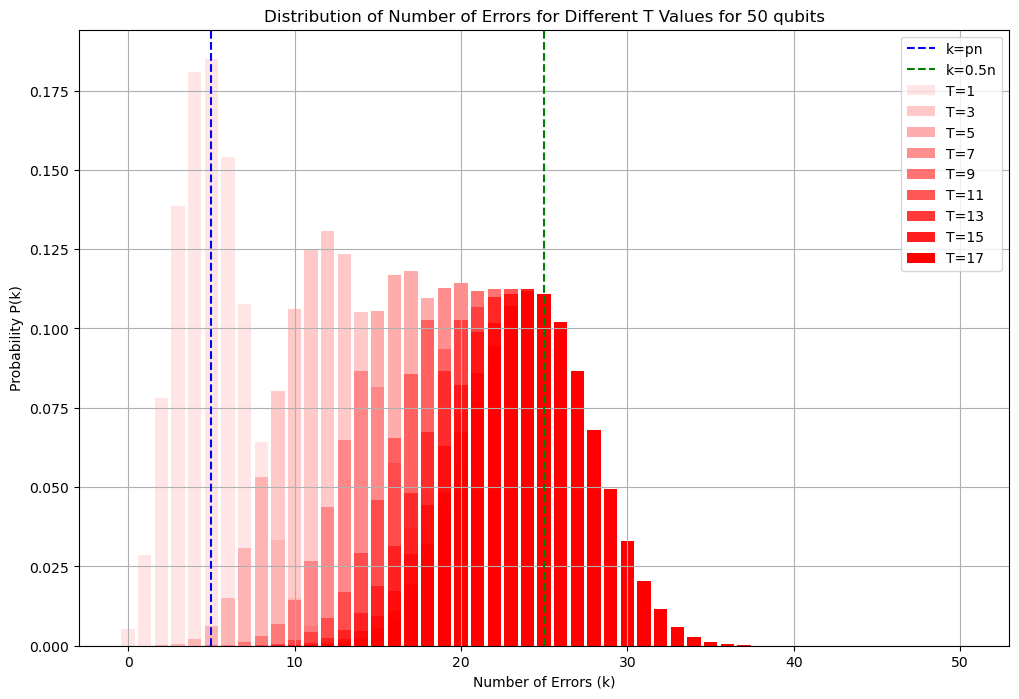

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

# Define the parameters
n = 50
T_values = [1, 3, 5, 7, 9, 11,13,15,17]
p = 0.1  # Assuming a bit-flip probability

# Function to calculate P(even) and P(odd)
def P_even_odd(T, p):
    P_even = sum(binom(T, 2*k) * p**(2*k) * (1-p)**(T-2*k) for k in range(T//2 + 1))
    P_odd = sum(binom(T, 2*k+1) * p**(2*k+1) * (1-p)**(T-2*k-1) for k in range((T+1)//2))
    return P_even, P_odd

# Function to calculate the distribution P(k)
def P_k(n, T, p):
    P_even, P_odd = P_even_odd(T, p)
    P_k_values = [binom(n, k) * (P_even**(n-k)) * (P_odd**k) for k in range(n+1)]
    return P_k_values

# Plotting the histograms
plt.figure(figsize=(12, 8))

# Define the base color and opacity increment
base_color = 'red'
opacities = np.linspace(0.1, 1.0, len(T_values))

for T, opacity in zip(T_values, opacities):
    P_k_values = P_k(n, T, p)
    plt.bar(range(n+1), P_k_values, alpha=opacity, color=base_color, label=f'T={T}')
# Plot the horizontal dashed line at x = p * n
plt.axvline(x=p*n, color='blue', linestyle='--', label="k=pn")
plt.axvline(x=0.5*n, color='green', linestyle='--', label="k=0.5n")


plt.xlabel('Number of Errors (k)')
plt.ylabel('Probability P(k)')
plt.title('Distribution of Number of Errors for Different T Values for 50 qubits')
plt.legend()
plt.grid(True)
plt.savefig("50QubitNoCNOT.png")
plt.show()


In [3]:
%matplotlib inline

In [3]:
from CNOTCircuit import CNOTCircuit
from matplotlib import pyplot as plt

10
20
30
40
50
60
70
80
90
100
110


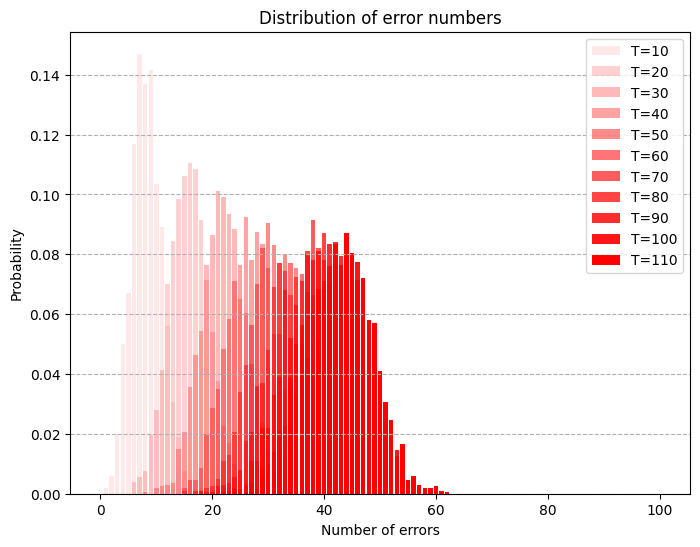

In [2]:
Tlist=[10,20,30,40,50,60,70,80,90,100,110]
plt.figure(figsize=(8, 6))
expectation_list=[]
entropy_list=[]
std_list=[]
for T in Tlist:
    print(T)
    circuit = CNOTCircuit(100, T, 0.01)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(2000)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list.append(tmpexp)
    entropy_list.append(circuit.calculate_entropy())
    std_list.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())

    # Normalize T to a value between 0 and 1 for the alpha
    alpha = T / max(Tlist)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'T={T}')
    plt.xlabel('Number of errors')
    plt.ylabel('Probability')
    plt.title('Distribution of error numbers')
    plt.grid(axis='y', linestyle='--', alpha=T/max(Tlist))

plt.legend()
plt.show()

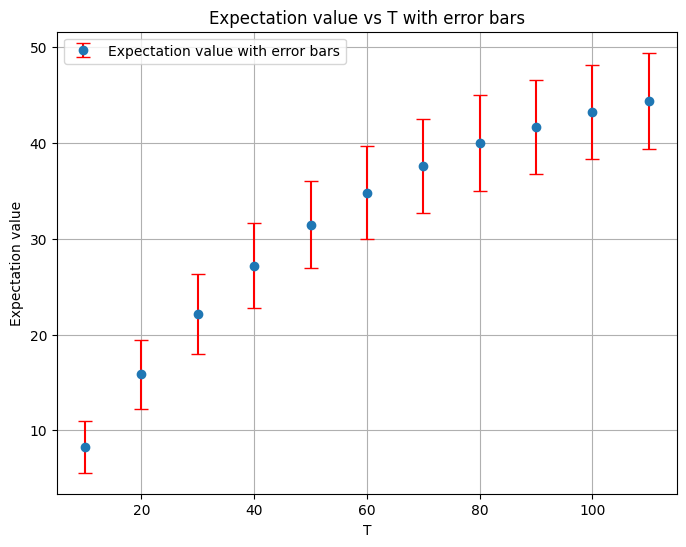

In [3]:

plt.figure(figsize=(8, 6))

# Plot the expectation values with error bars
plt.errorbar(Tlist, expectation_list, yerr=std_list, fmt='o', ecolor='red', capsize=5, label='Expectation value with error bars')

plt.xlabel('T')
plt.ylabel('Expectation value')
plt.title('Expectation value vs T with error bars')
plt.legend()
plt.grid(True)

plt.show()

In [1]:
from CNOTCircuit import CNOTCircuit,transversal_circuit



newcircuit=transversal_circuit(10, 5, 3, 0.01)
newcircuit.construct_qiskit_circuit()
newcircuit.show_circuit()

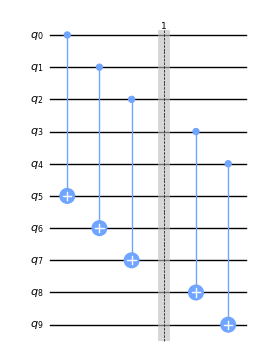

In [2]:
newcircuit._qiskitcircuit.draw(output='mpl',scale=0.5)

In [4]:
newcircuit._gateList

[(0, 5, 0), (1, 7, 0), (2, 9, 0), (3, 8, 1), (4, 10, 1)]

In [14]:
from CNOTCircuit import CNOTCircuit,transversal_circuit

gate_per_t=[100,300]
plt.figure(figsize=(8, 6))
expectation_list=[]
std_list=[]

circuit0=CNOTCircuit(200,40,0.0001)
circuit0.construct_all()
dis0=circuit0.calculate_distribution_sample(10000)
keys = list(dis0.keys())
values = list(dis0.values())

refexp,refstd=circuit0.get_expectation_and_std()


plt.bar(keys, values, color=(1, 1, 0, 1), label="Reference")


for gnum in gate_per_t:
    print(gnum)
    circuit=transversal_circuit(1000, 500, gnum, 0.0001)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(10000)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list.append(tmpexp)
    std_list.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())

    # Normalize T to a value between 0 and 1 for the alpha
    alpha = gnum / max(gate_per_t)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'gnum={gnum}')
    plt.xlabel('Number of errors')
    plt.ylabel('Probability')
    plt.title('Distribution of error numbers')
    plt.grid(axis='y', linestyle='--')

plt.legend()
plt.show()

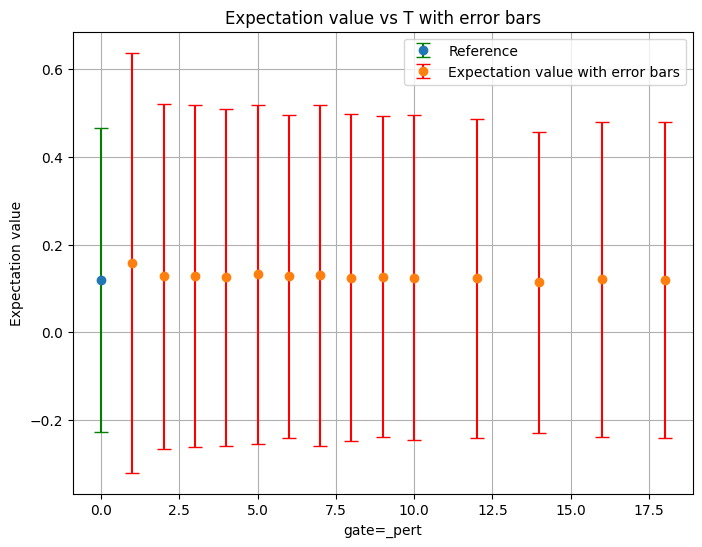

In [13]:

plt.figure(figsize=(8, 6))



plt.errorbar(0,refexp,refstd,fmt='o', ecolor='green', capsize=5, label='Reference')
# Plot the expectation values with error bars
plt.errorbar(gate_per_t, expectation_list, yerr=std_list, fmt='o', ecolor='red', capsize=5, label='Expectation value with error bars')

plt.xlabel('gate=_pert')
plt.ylabel('Expectation value')
plt.title('Expectation value vs T with error bars')
plt.legend()
plt.grid(True)

plt.show()

In [1]:
from CNOTCircuit import CNOTCircuit,transversal_circuit,random_circuit



circuit=random_circuit(20,10,3,0.01)
circuit.construct_all()
circuit.show_circuit()

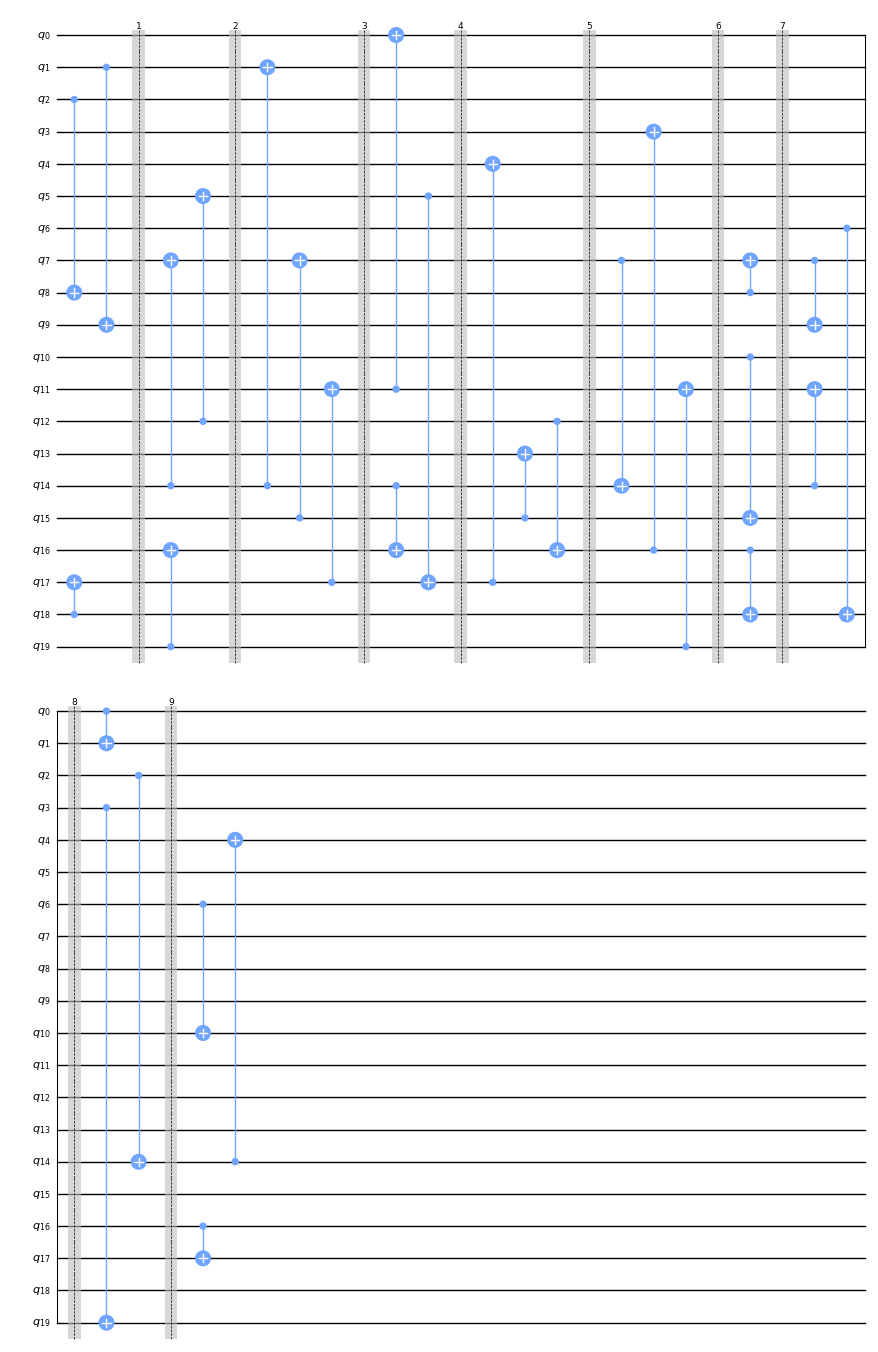

In [3]:
circuit._qiskitcircuit.draw(output='mpl',scale=0.5)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


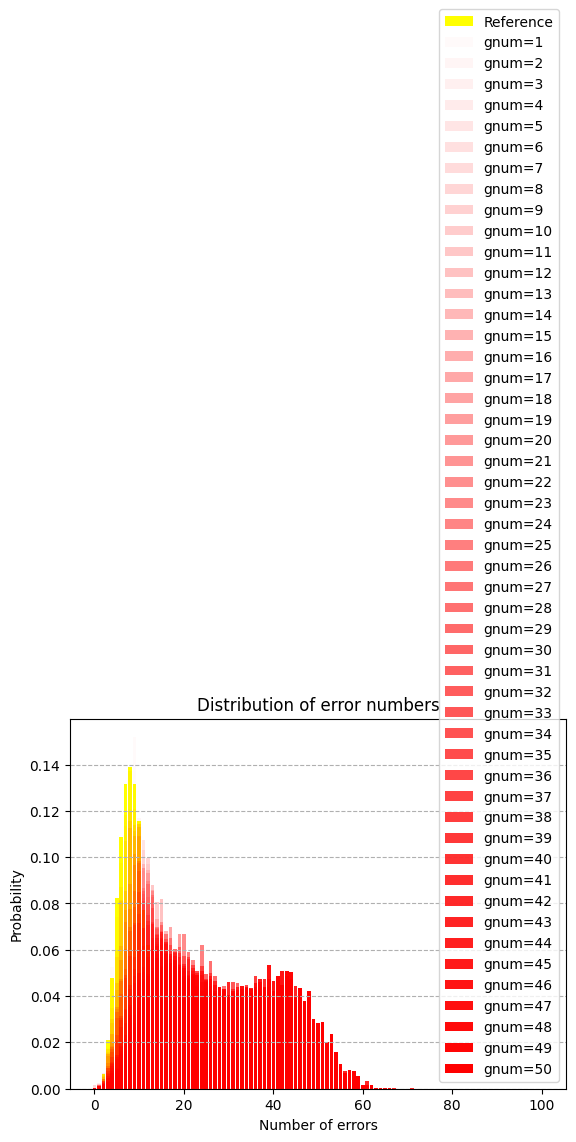

In [1]:
from CNOTCircuit import CNOTCircuit,transversal_circuit,random_circuit
import matplotlib.pyplot as plt


expectation_list=[]
std_list=[]

circuit0=CNOTCircuit(100,10,0.01)
circuit0.construct_all()
dis0=circuit0.calculate_distribution_sample(2000)
keys = list(dis0.keys())
values = list(dis0.values())

refexp,refstd=circuit0.get_expectation_and_std()



circuitfinal=CNOTCircuit(100,500,0.01)
circuitfinal.construct_all()
dis1=circuitfinal.calculate_distribution_sample(2000)
keys = list(dis0.keys())
values = list(dis0.values())

finalexp,finalstd=circuitfinal.get_expectation_and_std()




plt.bar(keys, values, color=(1, 1, 0, 1), label="Reference")


gnum_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]




for gnum in gnum_list:
    print(gnum)
    circuit=random_circuit(100,10,gnum,0.01)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(2000)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list.append(tmpexp)
    std_list.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())

    # Normalize T to a value between 0 and 1 for the alpha
    alpha = gnum / max(gnum_list)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'gnum={gnum}')

plt.xlabel('Number of errors')
plt.ylabel('Probability')
plt.title('Distribution of error numbers')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

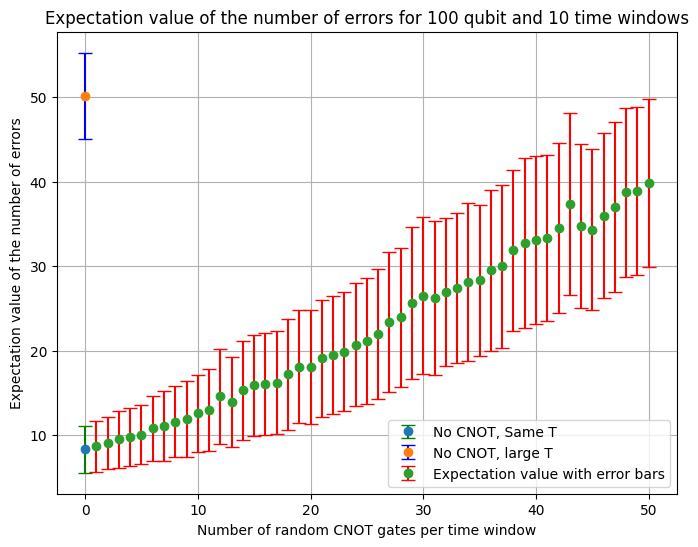

In [5]:

plt.figure(figsize=(8, 6))



plt.errorbar(0,refexp,refstd,fmt='o', ecolor='green', capsize=5, label='No CNOT, Same T')
plt.errorbar(0,finalexp,finalstd,fmt='o', ecolor='blue', capsize=5, label='No CNOT, large T')

# Plot the expectation values with error bars
plt.errorbar(gnum_list, expectation_list, yerr=std_list, fmt='o', ecolor='red', capsize=5, label='Expectation value with error bars')

plt.xlabel('Number of random CNOT gates per time window')
plt.ylabel('Expectation value of the number of errors')
plt.title('Expectation value of the number of errors for 100 qubit and 10 time windows')
plt.legend()
plt.grid(True)
plt.savefig("RandomCNOT.png")
plt.show()

In [1]:
%matplotlib inline

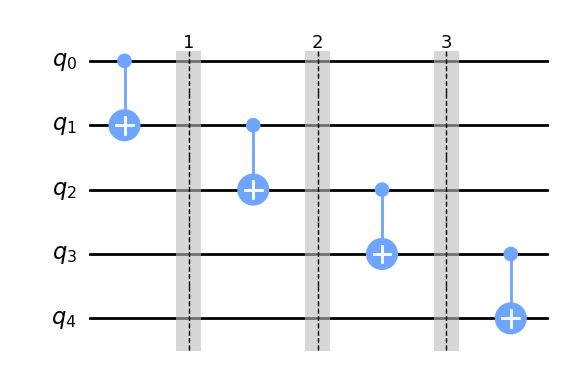

In [2]:
from CNOTCircuit import CNOTCircuit


circuit=CNOTCircuit(5,3,0.01)
circuit.add_CNOT(0,1,0)
circuit.add_CNOT(1,2,1)
circuit.add_CNOT(2,3,2)
circuit.add_CNOT(3,4,3)
circuit.construct_all()
circuit.show_circuit()
circuit._qiskitcircuit.draw(output="mpl")

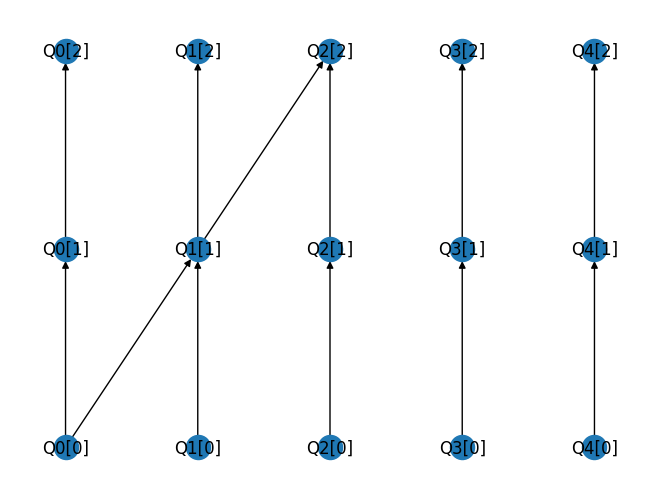

In [3]:
circuit.show_EPSTG()

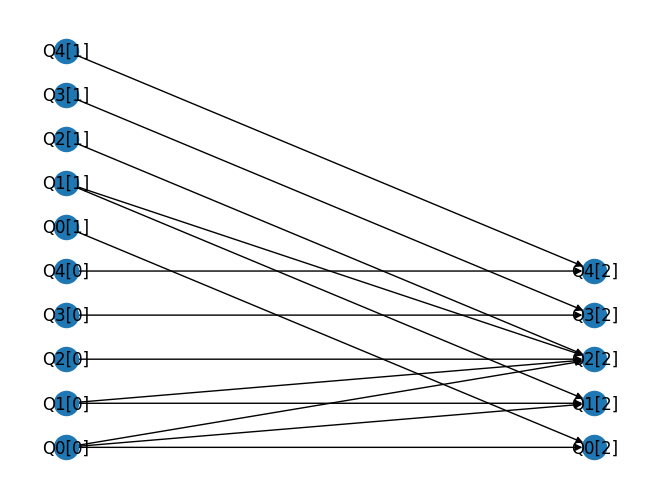

In [4]:
circuit.show_RSG()

In [5]:
circuit.show_matrix()

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]]


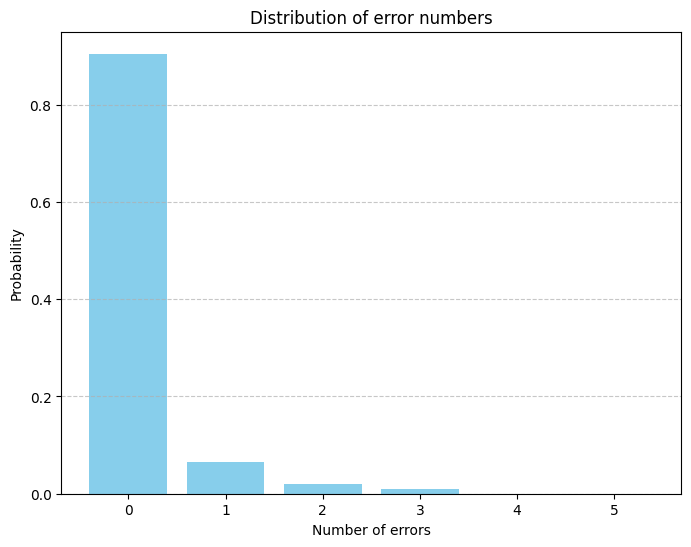

In [6]:
circuit.calculate_distribution_exact()
circuit.show_distribution()

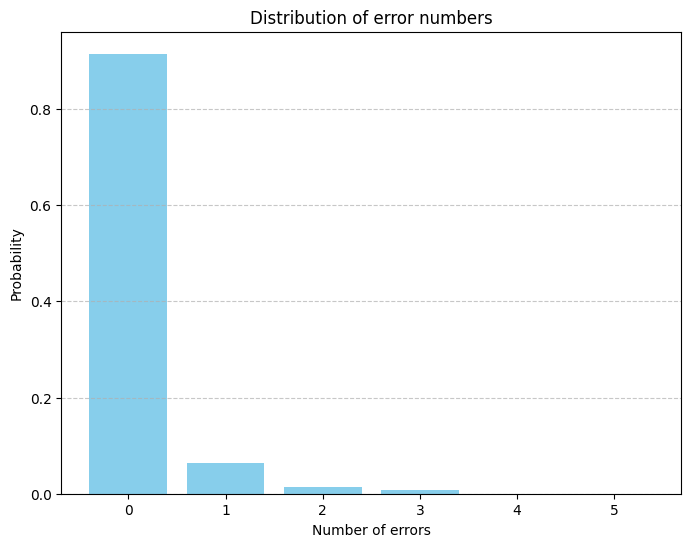

In [7]:
circuit.calculate_distribution_sample(1000)
circuit.show_distribution()

In [8]:
import numpy as np

In [9]:
circuit.calculate_entropy()
print(circuit._entropy)

0.5095312472412259


In [11]:
print(circuit._entropy)

0.5095312472412259


In [10]:
circuit._dist.values()

dict_values([0.915, 0.063, 0.015, 0.007, 0.0, 0.0])

In [2]:
np.log(3)

1.0986122886681098